## Problem Statement:

### Recommend a best book based on the ratings.

### Import libraries

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

### Reading the csv file

In [9]:
book=pd.read_csv("/content/book.csv", encoding="ISO-8859-1")
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


### Renaming the columns for easier access

In [10]:
book_new = book.rename({'User.ID':'user_id','Book.Title':'book_title','Book.Rating':'book_rating'},axis =1)
book_new.head()

,Unnamed: 0,user_id,book_title,book_rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


### Cheking of null values 

In [11]:
book_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   user_id      10000 non-null  int64 
 2   book_title   10000 non-null  object
 3   book_rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


### Number of unique users in the dataset

In [12]:
len(book_new['user_id'].unique())

2182

### Checking the shape

In [13]:
book_new.shape

(10000, 4)

### Number of unique books in the dataset

In [14]:
len(book_new['book_title'].unique())

9659

### Making a transpose of the dataframe and making the names of the books as the column names

In [15]:
book_df =book_new.pivot_table(index='user_id',
                                 columns='book_title',
                                 values='book_rating').reset_index(drop=True)
book_df.head()

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filling all the null values in the dataframe with 0

In [16]:
book_df.fillna(0, inplace=True)
book_df

book_title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
C = book_new['book_rating'].mean()
print(C)

7.5663


In [18]:
m = book_new['book_rating'].quantile(0.90)
print(m)

10.0


### Creating a list of book category which has a book rating greater than 90% quantile

In [19]:
q_Books = book_new.copy().loc[book_new['book_rating'] >= m]
q_Books.shape

(1732, 4)

### Using cosine function to find the mmore similar books based on the lower cosine angle between the vectors

In [20]:
uc_sim = 1 - pairwise_distances( book_df.values,metric='cosine')
uc_sim.shape

(2182, 2182)

In [21]:
uc_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [22]:
uc_sim[1]

array([0., 1., 0., ..., 0., 0., 0.])

In [23]:
uc_sim_df = pd.DataFrame(uc_sim)
uc_sim_df.index = book_new.user_id.unique()
uc_sim_df.columns = book_new.user_id.unique()

In [24]:
uc_sim_df.shape

(2182, 2182)

In [25]:
uc_sim_df.iloc[0:10, 0:10]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
u=book_new[(book_new['user_id']==276726) | (book_new['user_id']==17)]
u

,Unnamed: 0,user_id,book_title,book_rating
0,1,276726,Classical Mythology,5
2413,2414,17,Conversations With Dogbert: A Dilbert Book,7
2414,2415,17,The Dilbert Bunch: A Dilbert Book (Main Street...,5
2415,2416,17,You Don't Need Experience if You've Got Attitude,6
2416,2417,17,"The Boss: Nameless, Blameless and Shameless (A...",3


### Assigning user_1 with a particular user id

In [27]:
user_1=book_new[(book_new['user_id']==276726)] 
user_1

,Unnamed: 0,user_id,book_title,book_rating
0,1,276726,Classical Mythology,5


### Assigning user_2 with another user id

In [28]:
user_2=book_new[(book_new['user_id']==17)] 
user_2

,Unnamed: 0,user_id,book_title,book_rating
2413,2414,17,Conversations With Dogbert: A Dilbert Book,7
2414,2415,17,The Dilbert Bunch: A Dilbert Book (Main Street...,5
2415,2416,17,You Don't Need Experience if You've Got Attitude,6
2416,2417,17,"The Boss: Nameless, Blameless and Shameless (A...",3


In [29]:
indices = pd.Series(book_new.index, index=book_new['book_title']).drop_duplicates()

In [30]:
indices[:10]

book_title
Classical Mythology                                                                                   0
Clara Callan                                                                                          1
Decision in Normandy                                                                                  2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It    3
The Mummies of Urumchi                                                                                4
The Kitchen God's Wife                                                                                5
What If?: The World's Foremost Military Historians Imagine What Might Have Been                       6
PLEADING GUILTY                                                                                       7
Under the Black Flag: The Romance and the Reality of Life Among the Pirates                           8
Where You'll Find Me: And Other Stories              

### Creating a user defined function, that will get the book title and the cosine similarity as input and return a list of books thats are similar to the book that was given as input argument to the function

In [31]:
def get_recommendations(book_title, cosine_sim=uc_sim):

    idx = indices[book_title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[0:11]

    books_indices = [i[0] for i in sim_scores]

    return book_new['book_title'].iloc[books_indices]

### Trying to predict a book similar to Under the Black Flag: The Romance and the Reality of Life Among the Pirates

In [32]:
a=get_recommendations('Under the Black Flag: The Romance and the Reality of Life Among the Pirates')
a

8     Under the Black Flag: The Romance and the Real...
0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
Name: book_title, dtype: object

### Trying to predict a book similar to Classical Mythology

In [33]:
b=get_recommendations('Classical Mythology')
b

0                                   Classical Mythology
1                                          Clara Callan
2                                  Decision in Normandy
3     Flu: The Story of the Great Influenza Pandemic...
4                                The Mummies of Urumchi
5                                The Kitchen God's Wife
6     What If?: The World's Foremost Military Histor...
7                                       PLEADING GUILTY
8     Under the Black Flag: The Romance and the Real...
9               Where You'll Find Me: And Other Stories
10                          Nights Below Station Street
Name: book_title, dtype: object

### Merging the user 1 and user 2 based on the book rating they have given

In [34]:
pd.merge(user_1,user_2,on='book_rating',how='outer')

,Unnamed: 0_x,user_id_x,book_title_x,book_rating,Unnamed: 0_y,user_id_y,book_title_y
0,1.0,276726.0,Classical Mythology,5,2415,17,The Dilbert Bunch: A Dilbert Book (Main Street...
1,NaN,NaN,NaN,7,2414,17,Conversations With Dogbert: A Dilbert Book
2,NaN,NaN,NaN,6,2416,17,You Don't Need Experience if You've Got Attitude
3,NaN,NaN,NaN,3,2417,17,"The Boss: Nameless, Blameless and Shameless (A..."


In [35]:
book_user_rating = book_df["You Don't Need Experience if You've Got Attitude"]  

In [36]:
book_user_rating

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2177    0.0
2178    0.0
2179    0.0
2180    0.0
2181    0.0
Name: You Don't Need Experience if You've Got Attitude, Length: 2182, dtype: float64

### Finding the correlation with different movies

In [37]:
similar_to_book = book_df.corrwith(book_user_rating)

In [38]:
corr_book = pd.DataFrame(similar_to_book, columns=['Correlation'])
corr_book.dropna(inplace=True)
corr_book.head()

,Correlation
book_title,
"Jason, Madison &amp",-0.000459
Other Stories;Merril;1985;McClelland &amp,-0.000459
Repairing PC Drives &amp,-0.000459
'48,-0.000459
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000459


### Viewing the books based on the highly correlated books in descending order.

In [39]:
corr_book[corr_book['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(10)  

,Correlation
book_title,
Conversations With Dogbert: A Dilbert Book,1.0
"The Boss: Nameless, Blameless and Shameless (Adams, Scott, Dilbert Book,)",1.0
The Dilbert Bunch: A Dilbert Book (Main Street Editions),1.0
You Don't Need Experience if You've Got Attitude,1.0


In [40]:
ratings_mean_count = pd.DataFrame(book_new.groupby('book_title')['book_rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(book_new.groupby('book_title')['book_rating'].count())

### Plotting a graph to teh ratings count of the books

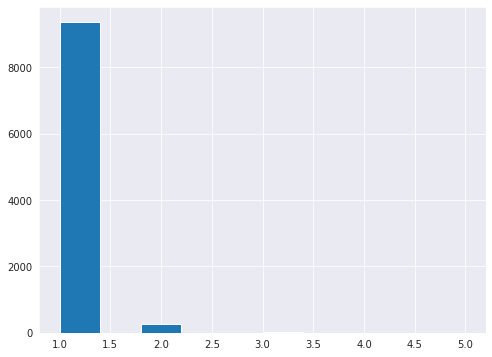

In [41]:
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=10)

### Plotting a graph to view the book rating

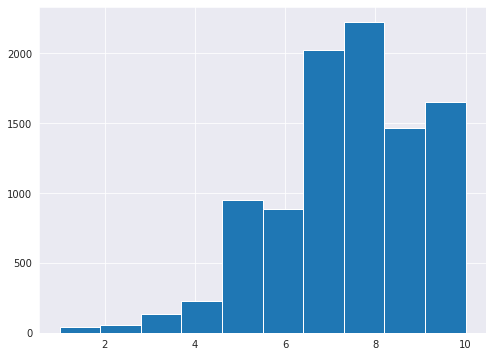

In [42]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['book_rating'].hist(bins=10)

### Plotting graph to visualise the book rating and rating counts together

<Figure size 576x432 with 0 Axes>

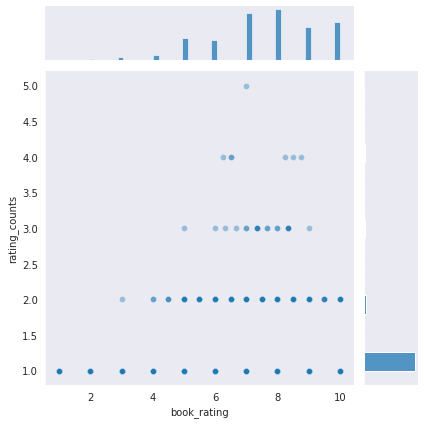

In [43]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='book_rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

## inference
### From the output, it is evident that the Books that have high correlation are not very well known. 
### This shows that correlation alone is not a good metric for similarity because there can be a user who wished to take those Books and rated them same.
### Thus, an association that is created here works well using the cosine similarity.